<a href="https://colab.research.google.com/github/Mukthat-31/HeartShield/blob/main/earlydiseaseEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving heart_disease_dataset.csv to heart_disease_dataset.csv


In [ ]:
df = pd.read_csv("heart_disease_dataset.csv")
df
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)


Dataset Shape: (500, 9)

Columns: ['age', 'sex', 'bmi', 'chest_pain', 'smoking', 'alcohol_drinking', 'stroke', 'blood_pressure', 'target']

Data Types:
 age                   int64
sex                  object
bmi                 float64
chest_pain           object
smoking               int64
alcohol_drinking      int64
stroke                int64
blood_pressure        int64
target                int64
dtype: object


In [ ]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 age                 0
sex                 0
bmi                 0
chest_pain          0
smoking             0
alcohol_drinking    0
stroke              0
blood_pressure      0
target              0
dtype: int64


In [21]:
# num_cols = df.select_dtypes(include=['float64', 'int64']).columns
# cat_cols = df.select_dtypes(include=['object']).columns

# num_imputer = SimpleImputer(strategy="median")
# df[num_cols] = num_imputer.fit_transform(df[num_cols])


# cat_imputer = SimpleImputer(strategy="most_frequent")
# df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# for col in ['Age','Blood Pressure','Cholesterol Level','BMI','Sleep Hours',
#             'Triglyceride Level','Fasting Blood Sugar','CRP Level','Homocysteine Level']:
#     Q1, Q3 = df[col].quantile([0.25, 0.75])
#     IQR = Q3 - Q1
#     df = df[(df[col] >= Q1 - 1.5*IQR) & (df[col] <= Q3 + 1.5*IQR)]


# df.to_csv("heart_disease_clean.csv", index=False)
# print("Final dataset shape:", df.shape)

import pandas as pd
from sklearn.impute import SimpleImputer

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numeric values with median
num_imputer = SimpleImputer(strategy="median")
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute categorical values with most frequent
cat_imputer = SimpleImputer(strategy="most_frequent")
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Outlier removal (using IQR) only for selected numeric columns
for col in ['age', 'bmi', 'blood_pressure']:
    if col in df.columns:  # safeguard against missing cols
        Q1, Q3 = df[col].quantile([0.25, 0.75])
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

# Save cleaned dataset
df.to_csv("heart_disease_clean.csv", index=False)
print("✅ Final dataset shape:", df.shape)


✅ Final dataset shape: (500, 9)


In [22]:
for col in df.columns:
    if df[col].dtype in ["int64", "float64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])

In [23]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

In [24]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\nShape after removing outliers:", df.shape)


Shape after removing outliers: (447, 9)


In [25]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
               age         bmi     smoking  alcohol_drinking  stroke  \
count  447.000000  447.000000  447.000000        447.000000   447.0   
mean    52.809843   28.950559    0.422819          0.315436     0.0   
std     13.807358    6.244674    0.494561          0.465210     0.0   
min     29.000000   18.700000    0.000000          0.000000     0.0   
25%     42.000000   23.500000    0.000000          0.000000     0.0   
50%     54.000000   28.700000    0.000000          0.000000     0.0   
75%     64.000000   34.400000    1.000000          1.000000     0.0   
max     76.000000   40.000000    1.000000          1.000000     0.0   

       blood_pressure      target  
count      447.000000  447.000000  
mean       135.814318    0.489933  
std         25.476076    0.500459  
min         90.000000    0.000000  
25%        114.000000    0.000000  
50%        138.000000    0.000000  
75%        157.000000    1.000000  
max        179.000000    1.000000  


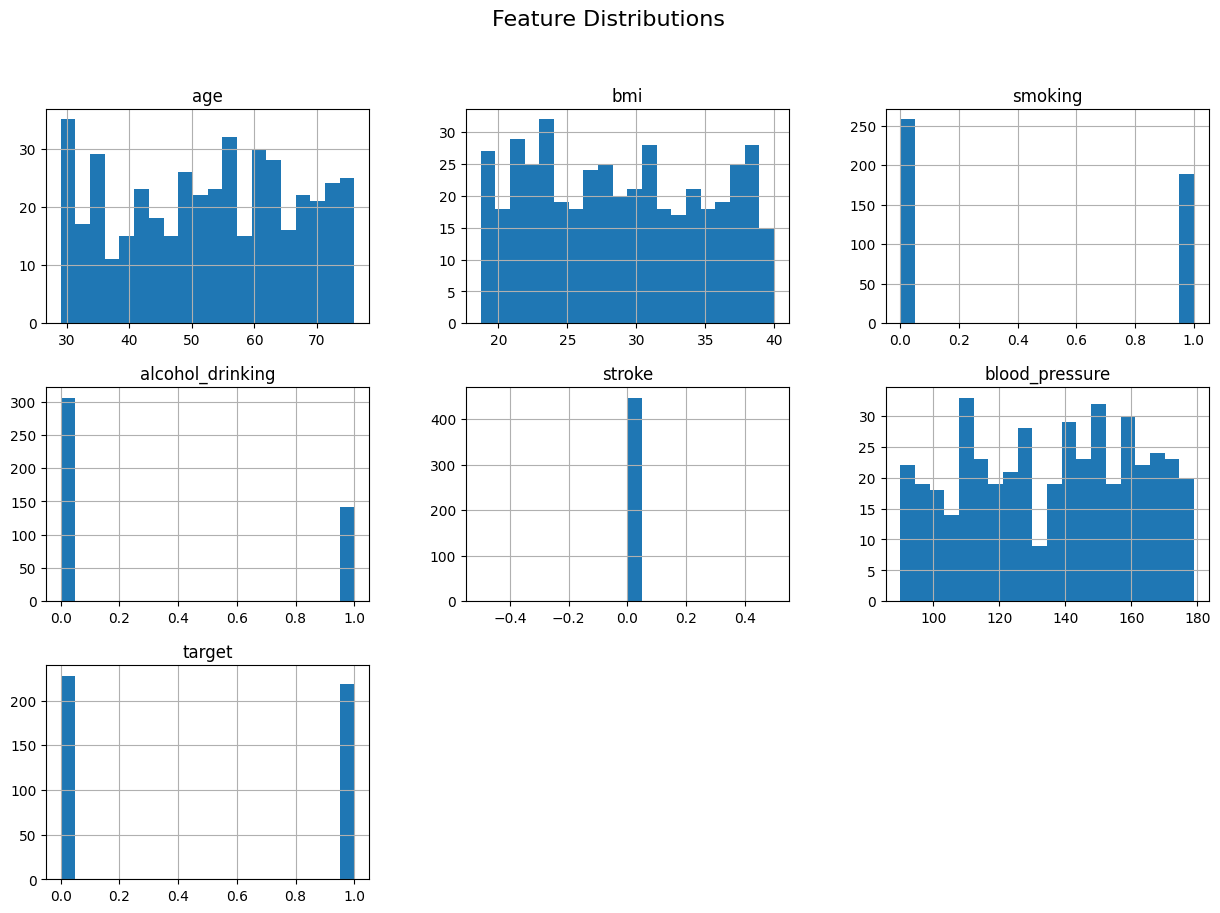

In [26]:
# Histogram for numerical columns
df.hist(bins=20, figsize=(15,10))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

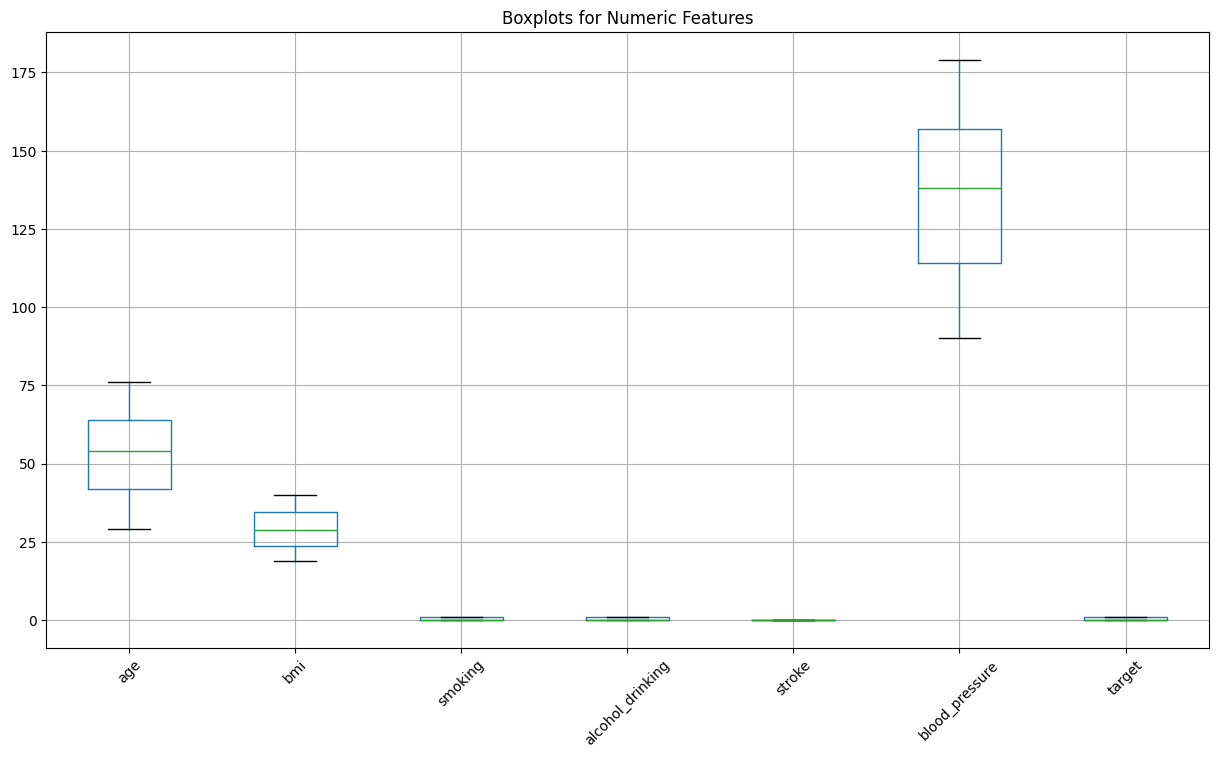

In [27]:
# Boxplots for outlier visualization
plt.figure(figsize=(15,8))
df[numeric_cols].boxplot()
plt.title("Boxplots for Numeric Features")
plt.xticks(rotation=45)
plt.show()

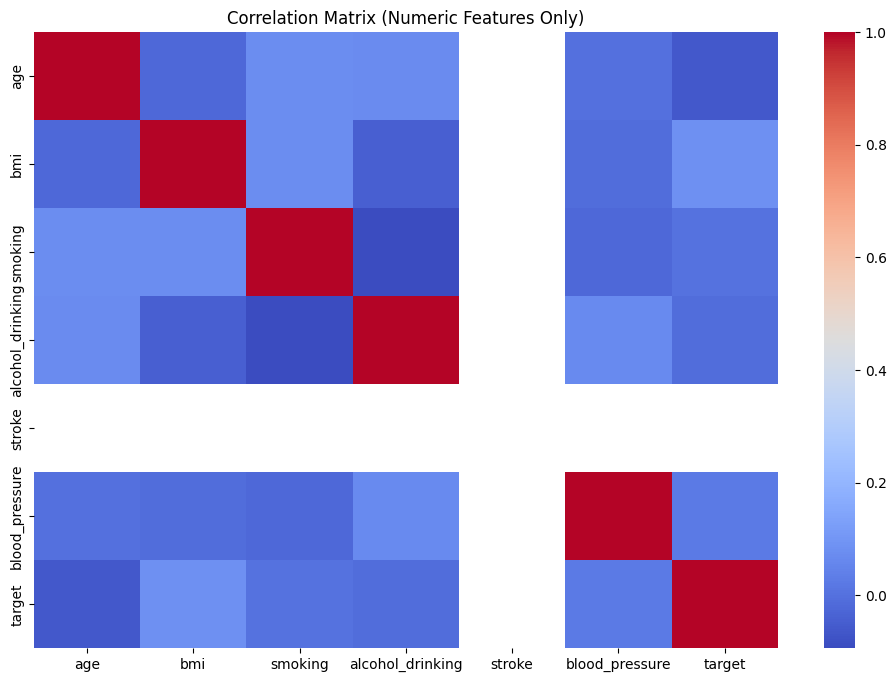

In [28]:

# Correlation Heatmap (only numeric features)
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['int64','float64']).corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Matrix (Numeric Features Only)")
plt.show()


In [29]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract opencv-python pillow pandas


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [30]:
import cv2
import pytesseract
import pandas as pd
from google.colab import files


In [31]:
uploaded = files.upload()   # Upload your table image
img = cv2.imread("report.jpg")


Saving report.jpg to report.jpg


In [32]:
text = pytesseract.image_to_string(img)
print("RAW OCR TEXT:\n", text)


RAW OCR TEXT:
 Medical Script for Heart Disease Prediction

 

 

 

 

 

 

 

 

 

 

 

 

Age | BloodPressure | Cholesterol) Glucose | Hemoglobin | HeartDisease
67 233 1 15.0 1
41 Se 130 250 1 14.2 1
56 | 160 223 2 13.3 0
57 | 120 204 0 17.2 0
55 =| 140 236 0 14.6 1
53 | 125 354 1 13.5 0
48 125 192 0 12.0 0
64 | 150 212 0 13.8 1
52 =| 130 250 2 16.4 0

 

 

 

 

 



In [35]:
# # lines = text.strip().split("\n")
# # rows = [line.split() for line in lines if line.strip()]

# # df = pd.DataFrame(rows)
# # print("DATAFRAME:\n", df)

# import pandas as pd

# # Drop first 2 rows (junk + OCR headers)
# df_clean = df.drop([0,1]).reset_index(drop=True)

# # Drop columns with None / junk (only keep useful ones)
# df_clean = df_clean[[0,2,3,4,5,6,8,9]]   # selecting only actual numeric columns

# # Rename columns properly
# df_clean.columns = ["Age", "BloodPressure", "Cholesterol", "Glucose", "Hemoglobin", "Target1", "Target2", "HeartDisease"]

# print("CLEANED DATA:\n", df_clean.head())

# # Convert numbers
# for col in df_clean.columns:
#     df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# print(df_clean.dtypes)

import pandas as pd
import re

# 🔹 Assuming your OCR extracted text is stored in variable `text`
# (don’t paste again, just keep it as is)

# Step 1: Split into lines
lines = text.strip().split("\n")

# Step 2: Clean each line
cleaned_lines = []
for line in lines:
    # Remove symbols like | and =
    line = re.sub(r"[|=]", " ", line)
    # Remove stray non-numeric words (like 'Se') except first header row
    if not line.lower().startswith("age"):
        line = re.sub(r"[A-Za-z]+", "", line)
    # Normalize spaces
    line = re.sub(r"\s+", " ", line).strip()
    if line:
        cleaned_lines.append(line)

# Step 3: Split rows into lists
rows = [row.split() for row in cleaned_lines]

# Step 4: Create dataframe
df = pd.DataFrame(rows)

# Step 5: First row is header, others are data
df.columns = ["Age", "BloodPressure", "Cholesterol", "Glucose", "Hemoglobin", "HeartDisease"]
df = df.drop(0).reset_index(drop=True)

# Step 6: Convert numeric columns
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# ✅ Final cleaned table
print("CLEANED DATAFRAME:\n")
print(df)

# Optional: show summary
print("\nDATA TYPES:\n", df.dtypes)




CLEANED DATAFRAME:

   Age  BloodPressure  Cholesterol  Glucose  Hemoglobin  HeartDisease
0   67            233            1     15.0         1.0           NaN
1   41            130          250      1.0        14.2           1.0
2   56            160          223      2.0        13.3           0.0
3   57            120          204      0.0        17.2           0.0
4   55            140          236      0.0        14.6           1.0
5   53            125          354      1.0        13.5           0.0
6   48            125          192      0.0        12.0           0.0
7   64            150          212      0.0        13.8           1.0
8   52            130          250      2.0        16.4           0.0

DATA TYPES:
 Age                int64
BloodPressure      int64
Cholesterol        int64
Glucose          float64
Hemoglobin       float64
HeartDisease     float64
dtype: object


In [37]:
print("Number of columns in df:", len(df.columns))
print("Columns are:", df.columns.tolist())




Number of columns in df: 6
Columns are: ['Age', 'BloodPressure', 'Cholesterol', 'Glucose', 'Hemoglobin', 'HeartDisease']


In [39]:
# df_clean = df_clean.drop(columns=["Target1", "Target2"])
# print(df_clean.head())


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif

In [41]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease_dataset.csv to heart_disease_dataset (1).csv


In [42]:
df = pd.read_csv("heart_disease_dataset.csv")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (500, 9)
Columns: ['age', 'sex', 'bmi', 'chest_pain', 'smoking', 'alcohol_drinking', 'stroke', 'blood_pressure', 'target']


In [43]:
df = df.fillna(df.median(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

In [44]:
num_cols = ["age","bmi","blood_pressure"]

scaler_minmax = MinMaxScaler()
df_norm = df.copy()
df_norm[num_cols] = scaler_minmax.fit_transform(df_norm[num_cols])

scaler_standard = StandardScaler()
df_std = df.copy()
df_std[num_cols] = scaler_standard.fit_transform(df_std[num_cols])

print("\nSample Normalized Data:\n", df_norm.head())
print("\nSample Standardized Data:\n", df_std.head())



Sample Normalized Data:
         age     sex       bmi        chest_pain  smoking  alcohol_drinking  \
0  0.808511  Female  0.084112  non-anginal pain        1                 1   
1  0.595745  Female  0.116822      asymptomatic        0                 1   
2  0.297872  Female  0.457944   atypical angina        1                 0   
3  0.893617  Female  0.200935    typical angina        1                 1   
4  0.148936    Male  0.359813    typical angina        0                 0   

   stroke  blood_pressure  target  
0       0        0.213483       0  
1       0        0.966292       0  
2       0        0.101124       0  
3       1        0.651685       0  
4       0        0.831461       0  

Sample Standardized Data:
         age     sex       bmi        chest_pain  smoking  alcohol_drinking  \
0  1.016915  Female -1.376007  non-anginal pain        1                 1   
1  0.291583  Female -1.263364      asymptomatic        0                 1   
2 -0.723881  Female -0.0886

In [45]:
cat_cols = ["sex","chest_pain"]

df_label = df.copy()
for col in cat_cols:
    le = LabelEncoder()
    df_label[col] = le.fit_transform(df_label[col])

df_onehot = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("\nLabel Encoded Sample:\n", df_label.head())
print("\nOne-Hot Encoded Sample:\n", df_onehot.head())


Label Encoded Sample:
    age  sex   bmi  chest_pain  smoking  alcohol_drinking  stroke  \
0   67    0  20.4           2        1                 1       0   
1   57    0  21.1           0        0                 1       0   
2   43    0  28.4           1        1                 0       0   
3   71    0  22.9           3        1                 1       1   
4   36    1  26.3           3        0                 0       0   

   blood_pressure  target  
0             109       0  
1             176       0  
2              99       0  
3             148       0  
4             164       0  

One-Hot Encoded Sample:
    age   bmi  smoking  alcohol_drinking  stroke  blood_pressure  target  \
0   67  20.4        1                 1       0             109       0   
1   57  21.1        0                 1       0             176       0   
2   43  28.4        1                 0       0              99       0   
3   71  22.9        1                 1       1             148       0  

In [46]:
df["age_group"] = pd.cut(df["age"], bins=[0,30,45,60,100],
                         labels=["Young","Adult","Middle","Senior"])

# Risk score (just a simple formula)
df["risk_score"] = (0.4*df["blood_pressure"] + 0.3*df["bmi"] + 0.3*df["age"])

print("\nWith Derived Features:\n", df[["age","bmi","blood_pressure","age_group","risk_score"]].head())




With Derived Features:
    age   bmi  blood_pressure age_group  risk_score
0   67  20.4             109    Senior       69.82
1   57  21.1             176    Middle       93.83
2   43  28.4              99     Adult       61.02
3   71  22.9             148    Senior       87.37
4   36  26.3             164     Adult       84.29


In [47]:
X = df_onehot.drop(columns=["target"])
y = df_onehot["target"]

selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("\nTop 5 Selected Features:", selected_features.tolist())


Top 5 Selected Features: ['age', 'bmi', 'sex_Male', 'chest_pain_atypical angina', 'chest_pain_typical angina']


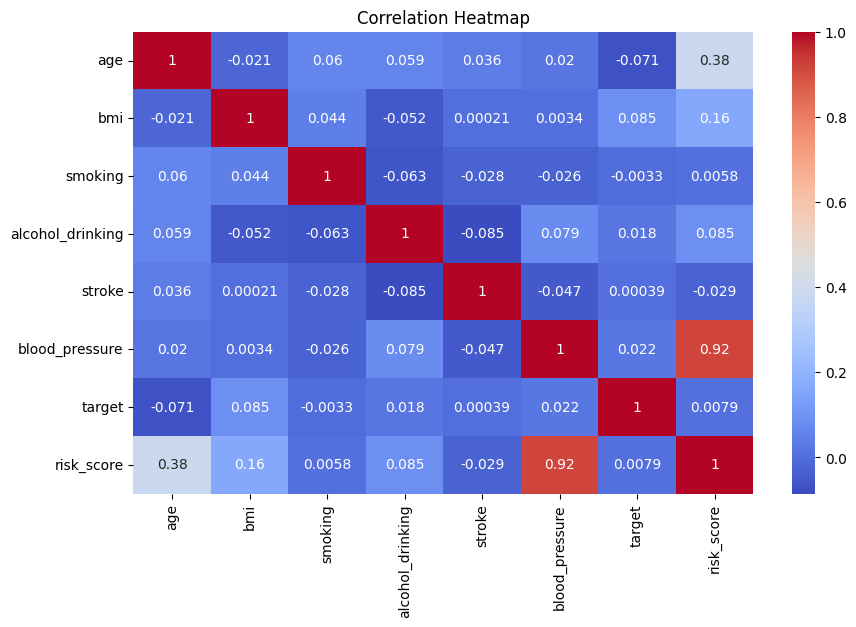


Correlation with target:
 target              1.000000
bmi                 0.085371
blood_pressure      0.021711
alcohol_drinking    0.017515
risk_score          0.007875
stroke              0.000390
smoking            -0.003326
age                -0.070545
Name: target, dtype: float64


In [48]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

print("\nCorrelation with target:\n", df.corr(numeric_only=True)["target"].sort_values(ascending=False))

In [49]:
df.to_csv("heart_disease_transformed.csv", index=False)
print("\n✅ Final transformed dataset saved as 'heart_disease_transformed.csv'")


✅ Final transformed dataset saved as 'heart_disease_transformed.csv'


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt


In [51]:
df.to_csv("heart_disease_transformed.csv", index=False)




In [52]:
files.download("heart_disease_transformed.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [53]:
print("Full Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())

Full Dataset Shape: (500, 11)
Columns: ['age', 'sex', 'bmi', 'chest_pain', 'smoking', 'alcohol_drinking', 'stroke', 'blood_pressure', 'target', 'age_group', 'risk_score']


In [54]:
X = df.drop(columns=["target"])
y = df["target"]

# First: Train (70%) + Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42
)

# Then: Validation (15%) + Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42
)

print(f"Train Shape: {X_train.shape}, Validation Shape: {X_val.shape}, Test Shape: {X_test.shape}")

Train Shape: (350, 10), Validation Shape: (75, 10), Test Shape: (75, 10)


In [55]:
def check_distribution(y, name):
    print(f"\nClass distribution in {name}:")
    print(y.value_counts(normalize=True))

check_distribution(y_train, "Train")
check_distribution(y_val, "Validation")
check_distribution(y_test, "Test")



Class distribution in Train:
target
0    0.508571
1    0.491429
Name: proportion, dtype: float64

Class distribution in Validation:
target
0    0.506667
1    0.493333
Name: proportion, dtype: float64

Class distribution in Test:
target
0    0.52
1    0.48
Name: proportion, dtype: float64


In [56]:
print("\nCheck for Missing Values:")
print(df.isnull().sum())

print("\nCheck for Duplicate Rows:", df.duplicated().sum())

# Ensure no data leakage
train_ids = set(X_train.index)
val_ids = set(X_val.index)
test_ids = set(X_test.index)

print("\nOverlap between splits:",
      len(train_ids & val_ids),
      len(train_ids & test_ids),
      len(val_ids & test_ids))


Check for Missing Values:
age                 0
sex                 0
bmi                 0
chest_pain          0
smoking             0
alcohol_drinking    0
stroke              0
blood_pressure      0
target              0
age_group           0
risk_score          0
dtype: int64

Check for Duplicate Rows: 0

Overlap between splits: 0 0 0



✅ Integrated Pipeline Flow:
OCR ➝ Cleaning ➝ Outlier Removal ➝ Feature Engineering ➝ Data Splitting

Dataset Summary (Numeric Features):
               age         bmi     smoking  alcohol_drinking      stroke  \
count  500.000000  500.000000  500.000000        500.000000  500.000000   
mean    52.980000   28.951000    0.418000          0.302000    0.106000   
std     13.800598    6.220583    0.493724          0.459585    0.308146   
min     29.000000   18.600000    0.000000          0.000000    0.000000   
25%     42.000000   23.500000    0.000000          0.000000    0.000000   
50%     54.000000   28.700000    0.000000          0.000000    0.000000   
75%     64.000000   34.400000    1.000000          1.000000    0.000000   
max     76.000000   40.000000    1.000000          1.000000    1.000000   

       blood_pressure      target  risk_score  
count      500.000000  500.000000  500.000000  
mean       135.404000    0.490000   78.740900  
std         25.459323    0.500401   11.21

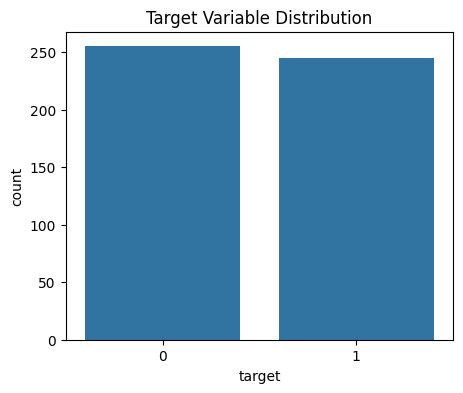

In [57]:
print("\n✅ Integrated Pipeline Flow:")
print("OCR ➝ Cleaning ➝ Outlier Removal ➝ Feature Engineering ➝ Data Splitting")

# -----------------------------
# 6. Generate Final Dataset Summary
# -----------------------------
print("\nDataset Summary (Numeric Features):\n", df.describe())

# Distribution of target
plt.figure(figsize=(5,4))
sns.countplot(x=df["target"])
plt.title("Target Variable Distribution")
plt.show()

In [58]:
train_set = pd.concat([X_train, y_train], axis=1)
val_set = pd.concat([X_val, y_val], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

train_set.to_csv("heart_train.csv", index=False)
val_set.to_csv("heart_val.csv", index=False)
test_set.to_csv("heart_test.csv", index=False)

print("\n✅ Saved: 'heart_train.csv', 'heart_val.csv', 'heart_test.csv'")


✅ Saved: 'heart_train.csv', 'heart_val.csv', 'heart_test.csv'
